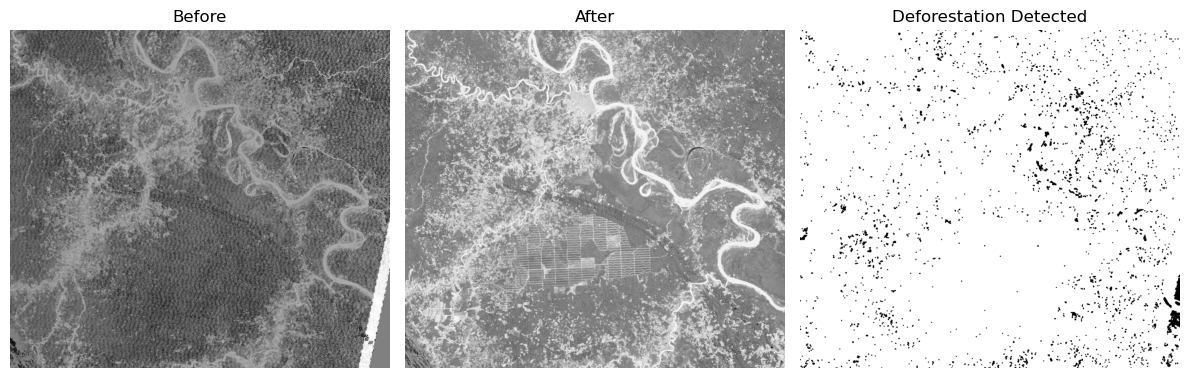

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndvi(image):
    image = image.astype(np.float32)
    b, g, r = cv2.split(image)
    ndvi = (r - b) / (r + b + 1e-7)
    ndvi_normalized = cv2.normalize(ndvi, None, 0, 255, cv2.NORM_MINMAX)
    return ndvi_normalized

def apply_morphological_operations(image):
    kernel = np.ones((5, 5), np.uint8)
    cleaned_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return cleaned_image

image_before = cv2.imread('yurimaguas_before.jpg')
image_after = cv2.imread('yurimaguas_after.jpg')

image_before_blurred = cv2.GaussianBlur(image_before, (5, 5), 0)
image_after_blurred = cv2.GaussianBlur(image_after, (5, 5), 0)

ndvi_before = calculate_ndvi(image_before_blurred)
ndvi_after = calculate_ndvi(image_after_blurred)

ndvi_diff = np.abs(ndvi_before - ndvi_after)
_, thresh_deforestation = cv2.threshold(ndvi_diff, 20, 255, cv2.THRESH_BINARY)

clean_deforestation = apply_morphological_operations(thresh_deforestation)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Before')
plt.imshow(ndvi_before, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('After')
plt.imshow(ndvi_after, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Deforestation Detected')
plt.imshow(clean_deforestation, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


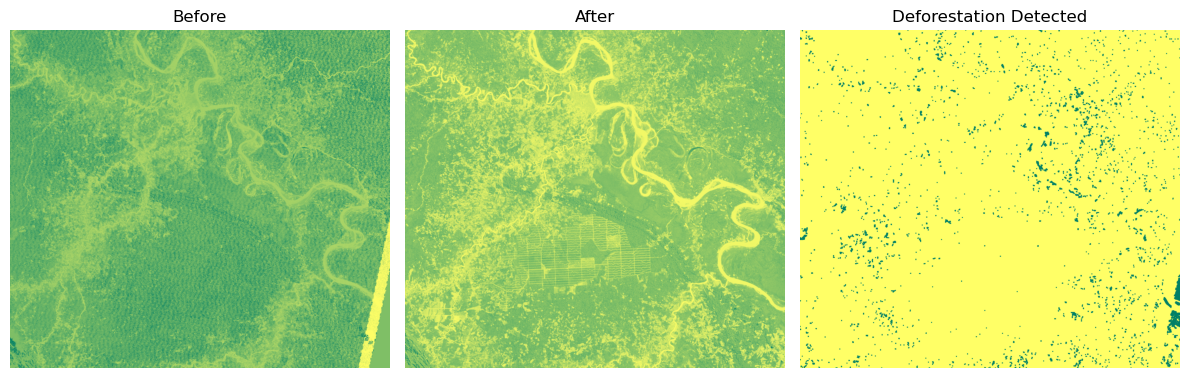

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def calculate_ndvi(image):
    image = image.astype(np.float32)
    b, g, r = cv2.split(image)
    ndvi = (r - b) / (r + b + 1e-7)
    ndvi_normalized = cv2.normalize(ndvi, None, 0, 255, cv2.NORM_MINMAX)
    return ndvi_normalized
def apply_green_colormap(image):

    image_8bit = np.uint8(image)
    colormap = cv2.COLORMAP_SUMMER  
    color_mapped_image = cv2.applyColorMap(image_8bit, colormap)
    
    return color_mapped_image
image_before = cv2.imread('yurimaguas_before.jpg')
image_after = cv2.imread('yurimaguas_after.jpg')

image_before_blurred = cv2.GaussianBlur(image_before, (5, 5), 0)
image_after_blurred = cv2.GaussianBlur(image_after, (5, 5), 0)

ndvi_before = calculate_ndvi(image_before_blurred)
ndvi_after = calculate_ndvi(image_after_blurred)


ndvi_diff = np.abs(ndvi_before - ndvi_after)
_, thresh_deforestation = cv2.threshold(ndvi_diff, 20, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
clean_deforestation = cv2.morphologyEx(thresh_deforestation, cv2.MORPH_CLOSE, kernel)


color_ndvi_before = apply_green_colormap(ndvi_before)
color_ndvi_after = apply_green_colormap(ndvi_after)
color_deforestation = apply_green_colormap(clean_deforestation)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Before')
plt.imshow(cv2.cvtColor(color_ndvi_before, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('After')
plt.imshow(cv2.cvtColor(color_ndvi_after, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Deforestation Detected')
plt.imshow(cv2.cvtColor(color_deforestation, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


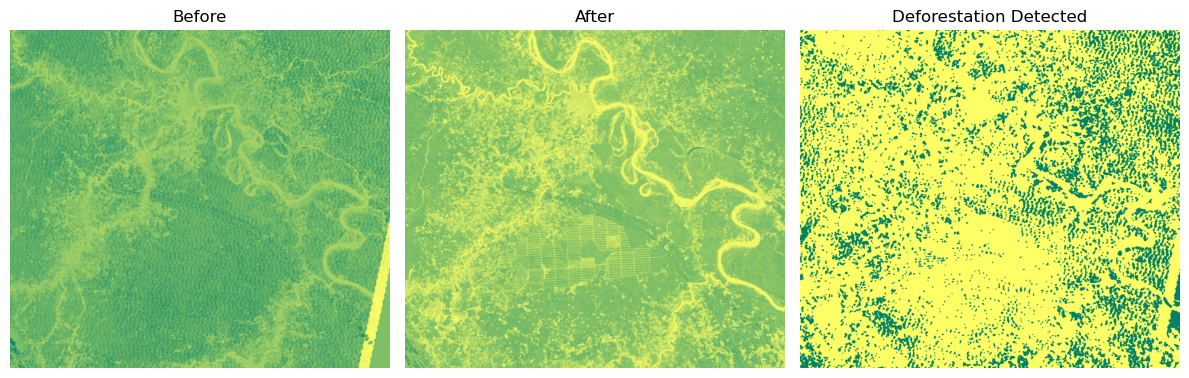

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndvi(image):
    image = image.astype(np.float32)
    b, g, r = cv2.split(image)
    ndvi = (r - b) / (r + b + 1e-7)
    ndvi_normalized = cv2.normalize(ndvi, None, 0, 255, cv2.NORM_MINMAX)
    return ndvi_normalized

def apply_green_colormap(image):
    image_8bit = np.uint8(image)
    colormap = cv2.COLORMAP_SUMMER
    color_mapped_image = cv2.applyColorMap(image_8bit, colormap)
    return color_mapped_image

def change_vector_analysis(ndvi_before, ndvi_after):
    diff = ndvi_after - ndvi_before
    change_magnitude = np.sqrt(diff**2)
    return change_magnitude

def post_process_change_detection(change_magnitude):
    filtered_change = cv2.medianBlur(np.uint8(change_magnitude), 5)
    _, thresh_change = cv2.threshold(filtered_change, 30, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    clean_change = cv2.morphologyEx(thresh_change, cv2.MORPH_CLOSE, kernel)
    return clean_change

image_before = cv2.imread('yurimaguas_before.jpg')
image_after = cv2.imread('yurimaguas_after.jpg')

image_before_blurred = cv2.GaussianBlur(image_before, (5, 5), 0)
image_after_blurred = cv2.GaussianBlur(image_after, (5, 5), 0)

ndvi_before = calculate_ndvi(image_before_blurred)
ndvi_after = calculate_ndvi(image_after_blurred)

change_magnitude = change_vector_analysis(ndvi_before, ndvi_after)

clean_deforestation = post_process_change_detection(change_magnitude)

color_ndvi_before = apply_green_colormap(ndvi_before)
color_ndvi_after = apply_green_colormap(ndvi_after)
color_deforestation = apply_green_colormap(clean_deforestation)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Before')
plt.imshow(cv2.cvtColor(color_ndvi_before, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('After')
plt.imshow(cv2.cvtColor(color_ndvi_after, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Deforestation Detected')
plt.imshow(cv2.cvtColor(color_deforestation, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2

# Set tracker type
tracker_type = 'KCF'
if tracker_type == 'KCF':
    tracker = cv2.legacy.TrackerKCF_create()
elif tracker_type == 'MOSSE':
    tracker = cv2.legacy.TrackerMOSSE_create()
else:
    raise ValueError("Unsupported tracker type. Use 'KCF' or 'MOSSE'.")

# Use video from a network source (e.g., an HTTP or RTSP stream)
video_url = 'http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4'  # Example video URL
video = cv2.VideoCapture(video_url)

ret, frame = video.read()
if not ret:
    print("Failed to read the video stream. Exiting...")
    video.release()
    cv2.destroyAllWindows()
    exit()
bbox = cv2.selectROI("Select Object to Track", frame, False)
tracker.init(frame, bbox)

while True:
    ret, frame = video.read()
    if not ret:
        break
    success, bbox = tracker.update(frame)
    if success:
        x, y, w, h = map(int, bbox)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    else:
        cv2.putText(frame, "Tracking failure", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    cv2.imshow("Object Tracking", frame)

    # Exit on 'ESC' key
    if cv2.waitKey(1) & 0xFF == 27:
        break

video.release()
cv2.destroyAllWindows(